# Введение в проект: Анализ данных сервиса проката самокатов GoFast

## Описание проекта
В данном проекте мы будем анализировать данные крупного сервиса проката самокатов **GoFast**. Наша задача — изучить демографию пользователей, особенности их поездок, а также оценить потенциальную выгоду от распространения платной подписки на самокаты.

Компания предоставила три набора данных:
1. **Пользователи (`users_go.csv`)**: информация о пользователях, включая их идентификатор, имя, возраст, город и тип подписки.
2. **Поездки (`rides_go.csv`)**: данные о поездках пользователей, включая расстояние, продолжительность и дату поездки.
3. **Подписки (`subscriptions_go.csv`)**: информация о типах подписок, их стоимости и тарифах.


## Описание данных

В данном проекте мы работаем с тремя основными таблицами, предоставленными сервисом проката самокатов **GoFast**. Ниже приведено описание каждой таблицы и её полей.

---

### 1. Таблица с пользователями: **users_go.csv**

Эта таблица содержит информацию о пользователях сервиса. Поля таблицы:

- **user_id**: Уникальный идентификатор пользователя.
- **name**: Имя пользователя.
- **age**: Возраст пользователя.
- **city**: Город, в котором проживает пользователь.
- **subscription_type**: Тип подписки пользователя. Возможные значения:
  - `free` — бесплатная подписка.
  - `ultra` — платная подписка.

---

### 2. Таблица с поездками: **rides_go.csv**

Эта таблица содержит данные о поездках пользователей. Поля таблицы:

- **user_id**: Уникальный идентификатор пользователя, совершившего поездку.
- **distance**: Расстояние в метрах, которое пользователь проехал в текущей сессии.
- **duration**: Продолжительность сессии в минутах. Это время с момента нажатия кнопки «Начать поездку» до нажатия кнопки «Завершить поездку».
- **date**: Дата совершения поездки.

---

### 3. Таблица с подписками: **subscriptions_go.csv**

Эта таблица содержит информацию о типах подписок и их тарифах. Поля таблицы:

- **subscription_type**: Тип подписки. Возможные значения:
  - `free` — бесплатная подписка.
  - `ultra` — платная подписка.
- **minute_price**: Стоимость одной минуты поездки для данного типа подписки.
- **start_ride_price**: Стоимость начала поездки для данного типа подписки.
- **subscription_fee**: Стоимость ежемесячного платежа для данного типа подписки.

---

### Шаг 1. Загрузка данных

In [4]:
# Добавляем библиотеки 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Заружеаем датафремы
df_users_go = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')
df_rides_go = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv')
df_subscriptions_go = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')

In [163]:
len_users = len(df_users_go)
len_rides = len(df_rides_go)
len_subs = len(df_subscriptions_go)
print(len_users, len_rides, len_subs)

1534 18068 2


#### Вывод первых строк каждого датафрейма

In [7]:
print("\nПервые строки df_users_go:\n")
display(df_users_go.head())


Первые строки df_users_go:



,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [8]:
print("\nПервые строки df_rides_go:\n")
print(df_rides_go.head())


Первые строки df_rides_go:

   user_id     distance   duration        date
0        1  4409.919140  25.599769  2021-01-01
1        1  2617.592153  15.816871  2021-01-18
2        1   754.159807   6.232113  2021-04-20
3        1  2694.783254  18.511000  2021-08-11
4        1  4028.687306  26.265803  2021-08-28


In [9]:
print("\nПервые строки df_subscriptions_go:\n")
print(df_subscriptions_go.head())


Первые строки df_subscriptions_go:

  subscription_type  minute_price  start_ride_price  subscription_fee
0              free             8                50                 0
1             ultra             6                 0               199


#### Изучение общей информации о каждом датафрейм

In [11]:
print("\nИнформация о df_users_go:\n")
print(df_users_go.info())


Информация о df_users_go:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
None


#### 1. Таблица **df_users_go** (пользователи)
- **Количество записей**: 1565
- **Поля**:
  - `user_id`: Уникальный идентификатор пользователя.
  - `name`: Имя пользователя.
  - `age`: Возраст пользователя.
  - `city`: Город проживания пользователя.
  - `subscription_type`: Тип подписки (`free` или `ultra`).
- **Типы данных**:
  - `int64`: `user_id`, `age`.
  - `object`: `name`, `city`, `subscription_type`.
- **Пропуски**: Отсутствуют (все поля заполнены).

In [13]:
print("\nИнформация о df_rides_go:\n")
print(df_rides_go.info())


Информация о df_rides_go:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB
None


#### 2. Таблица df_rides_go (поездки)
- **Количество записей**: 18068
- **Поля**:
    - 'user_id': Уникальный идентификатор пользователя.
    - 'distance': Расстояние поездки в метрах.
    - 'duration': Продолжительность поездки в минутах.
    - 'date': Дата поездки.
- **Типы данных**:
    - 'int64': 'user_id'.
    - 'float64': 'distance', 'duration'.
    - 'object': 'date'.
- **Пропуски**: Отсутствуют (все поля заполнены).

In [15]:
print("\nИнформация о df_subscriptions_go:\n")
print(df_subscriptions_go.info())


Информация о df_subscriptions_go:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes
None


#### 3. Таблица **df_subscriptions_go** (подписки)
- **Количество записей**: 2
- **Поля**:
  - `subscription_type`: Тип подписки (`free` или `ultra`).
  - `minute_price`: Стоимость одной минуты поездки.
  - `start_ride_price`: Стоимость начала поездки.
  - `subscription_fee`: Ежемесячная стоимость подписки.
- **Типы данных**:
  - `object`: `subscription_type`.
  - `int64`: `minute_price`, `start_ride_price`, `subscription_fee`.
- **Пропуски**: Отсутствуют (все поля заполнены).

---

### Шаг 2. Предобработка данных

#### 2.1 Приведение столбца `date` к типу даты
Для корректной работы с датами в pandas преобразуем столбец `date` в датафрейме `df_rides_go` в тип `datetime`.

In [20]:
# Преобразуем столбец date в тип datetime
df_rides_go['date'] = pd.to_datetime(df_rides_go['date'])

# Проверяем результат
print("\nТип данных столбца date после преобразования:\n")
print(df_rides_go['date'].dtype)


Тип данных столбца date после преобразования:

datetime64[ns]


#### 2.2 Создание нового столбца с номером месяца
На основе столбца date создадим новый столбец month, который будет содержать номер месяца поездки.

In [22]:
# Создаем новый столбец month
df_rides_go['month'] = df_rides_go['date'].dt.month

# Проверяем результат
print("\nПервые строки df_rides_go с новым столбцом month:\n")
print(df_rides_go.head())


Первые строки df_rides_go с новым столбцом month:

   user_id     distance   duration       date  month
0        1  4409.919140  25.599769 2021-01-01      1
1        1  2617.592153  15.816871 2021-01-18      1
2        1   754.159807   6.232113 2021-04-20      4
3        1  2694.783254  18.511000 2021-08-11      8
4        1  4028.687306  26.265803 2021-08-28      8


#### Шаг 2.3 Проверка и обработка пропущенных значений и дубликатов

**Проверка пропущенных значений**

Проверим наличие пропущенных значений в каждом датафрейме.

In [24]:
# Проверка пропущенных значений в df_users_go
print("Пропущенные значения в df_users_go:")
print(df_users_go.isnull().sum())

# Проверка пропущенных значений в df_rides_go
print("\nПропущенные значения в df_rides_go:")
print(df_rides_go.isnull().sum())

# Проверка пропущенных значений в df_subscriptions_go
print("\nПропущенные значения в df_subscriptions_go:")
print(df_subscriptions_go.isnull().sum())

Пропущенные значения в df_users_go:
user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

Пропущенные значения в df_rides_go:
user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

Пропущенные значения в df_subscriptions_go:
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


**Проверка дубликатов**

Проверим наличие дубликатов в каждом датафрейме.

In [26]:
# Проверка дубликатов в df_users_go
print("Количество дубликатов в df_users_go:")
print(df_users_go.duplicated().sum())

# Проверка дубликатов в df_rides_go
print("\nКоличество дубликатов в df_rides_go:")
print(df_rides_go.duplicated().sum())

# Проверка дубликатов в df_subscriptions_go
print("\nКоличество дубликатов в df_subscriptions_go:")
print(df_subscriptions_go.duplicated().sum())

Количество дубликатов в df_users_go:
31

Количество дубликатов в df_rides_go:
0

Количество дубликатов в df_subscriptions_go:
0


**Обработка дубликатов в 'df_users_go'**

В датафрейме `df_users_go` обнаружено **31 дубликат**. 

Удалим их, так как дубликаты могут искажать результаты анализа.

In [28]:
# Удаление дубликатов в df_users_go
df_users_go.drop_duplicates(inplace=True)

# Проверка количества дубликатов после удаления
print("Количество дубликатов в df_users_go после удаления:")
print(df_users_go.duplicated().sum())

Количество дубликатов в df_users_go после удаления:
0


---

### Шаг 3. Исследовательский анализ данных

#### 3.1 Частота встречаемости городов

**Инструмент**: горизонтальная гистограмма по частоте city.

**Цель**: выявить города с наибшей активностью.


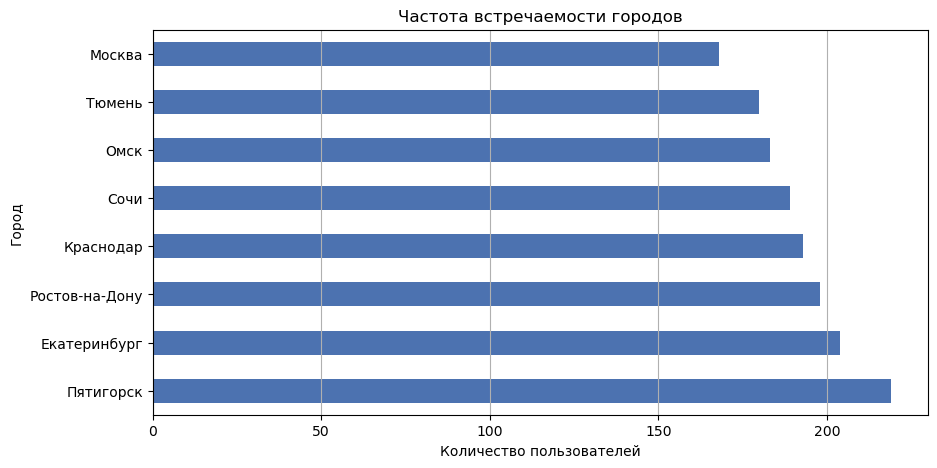

In [66]:
# Цветовая палитра
main_color = '#4C72B0'     # синий для гистограмм
accent_color = '#55A868'   # зелёный для pie chart

# Построение графика
df_users_go['city'].value_counts().plot(
    kind='barh',
    figsize=(10, 5),
    color=main_color
)
plt.title('Частота встречаемости городов')
plt.xlabel('Количество пользователей')
plt.ylabel('Город')
plt.grid(axis='x')
plt.show()

**График показывает:**
- Наибольшее количество пользователей проживает в Пятигорске, Екатеринбурге и Ростове-на-Дону.
- Москва занимает не первую позицию, что может указывать на либо насыщенность рынка, либо меньшую востребованность сервиса.

**Вывод:**  
Региональное распределение пользователей помогает определить ключевые направления для маркетинга и локального развития сервиса.

#### 3.2 Соотношение пользователей с подпиской и без подписки

**Цель:** определить долю пользователей, использующих платную (`ultra`) и бесплатную (`free`) подписку.


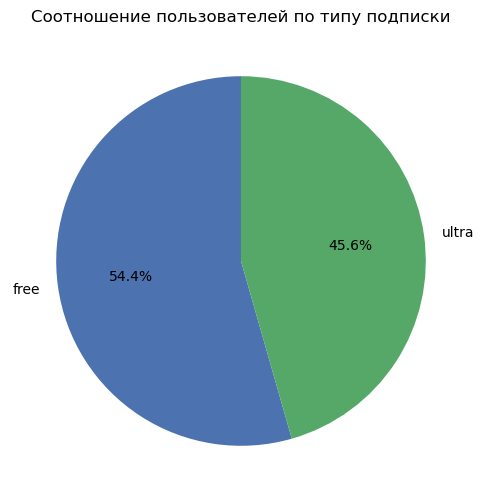

In [64]:
colors = ['#4C72B0', '#55A868']  # синий — бесплатная, зелёный — платная

df_users_go['subscription_type'].value_counts().plot(
    kind='pie',
    autopct='%.1f%%',
    startangle=90,
    colors=colors,
    figsize=(6, 6)
)
plt.title('Соотношение пользователей по типу подписки')
plt.ylabel('')
plt.show()

**График показывает:**
- Почти **поровну**: ~54% пользователей остаются на бесплатной версии.
- Почти **половина** аудитории уже платит за подписку `ultra`.

**Вывод:**  
Доля платных пользователей довольно высока, что может говорить о востребованности модели подписки.  
Тем не менее, ещё половина аудитории — потенциальные клиенты, которых можно конвертировать при помощи бонусов, акций или дополнительных функций.

#### 3.3 Возраст пользователей

**Цель:** изучить распределение возрастов среди пользователей сервиса GoFast.

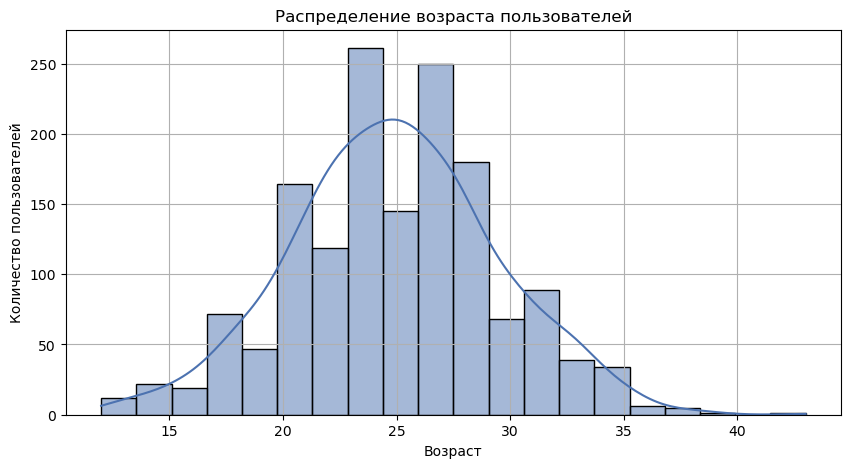

In [70]:
# Цветовая палитра
main_color = '#4C72B0'

# Визуализация
plt.figure(figsize=(10, 5))
sns.histplot(df_users_go['age'], bins=20, kde=True, color=main_color)
plt.title('Распределение возраста пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

**График показывает:**
- Наиболее активная группа — пользователи в возрасте от **18 до 30 лет**.
- Пик активности приходится на **24–27 лет**.
- После 35 лет количество пользователей резко уменьшается.

**Вывод:**  
Целевая аудитория сервиса — молодые люди, скорее всего студенты и молодые специалисты.  
В дальнейших маркетинговых активностях стоит делать акцент на молодёжную аудиторию и учитывать их привычки, график активности и каналы коммуникации.

#### 3.4 Расстояние за одну поездку

**Цель:** изучить, какие дистанции пользователи проезжают за одну поездку.

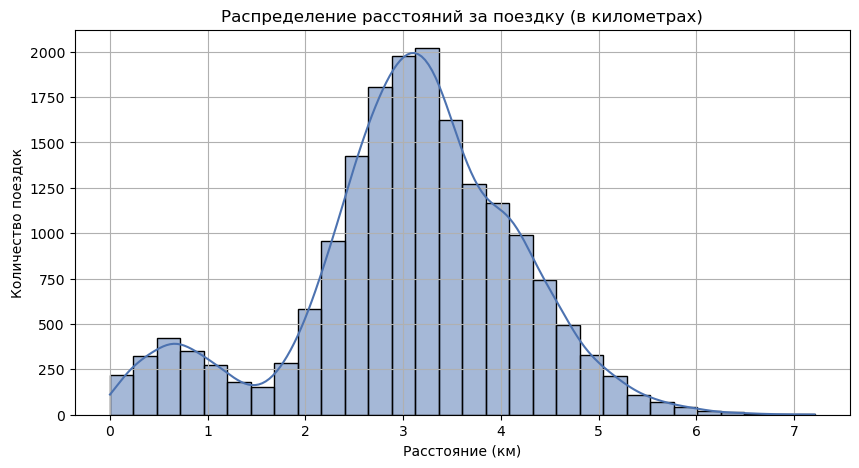

In [74]:
# Цветовая палитра
main_color = '#4C72B0'

# Визуализация
plt.figure(figsize=(10, 5))
sns.histplot(df_rides_go['distance'] / 1000, bins=30, kde=True, color=main_color)
plt.title('Распределение расстояний за поездку (в километрах)')
plt.xlabel('Расстояние (км)')
plt.ylabel('Количество поездок')
plt.grid()
plt.show()

**График показывает:**
- Основной кластер поездок — от **1.5 до 4 км**, с пиком около **3 км**.
- Распределение скошено вправо — длинные поездки редки, но присутствуют (возможно, прогулки или поездки за город).
- Поездки длиной более 6 км — единичны и могут быть выбросами или нетипичным сценарием использования.

**Вывод:**  
Типичная поездка на самокате GoFast — это короткое перемещение в пределах 3 км.  

#### 3.5 Продолжительность поездки

**Цель:** проанализировать, как долго в среднем длятся поездки на самокатах GoFast.


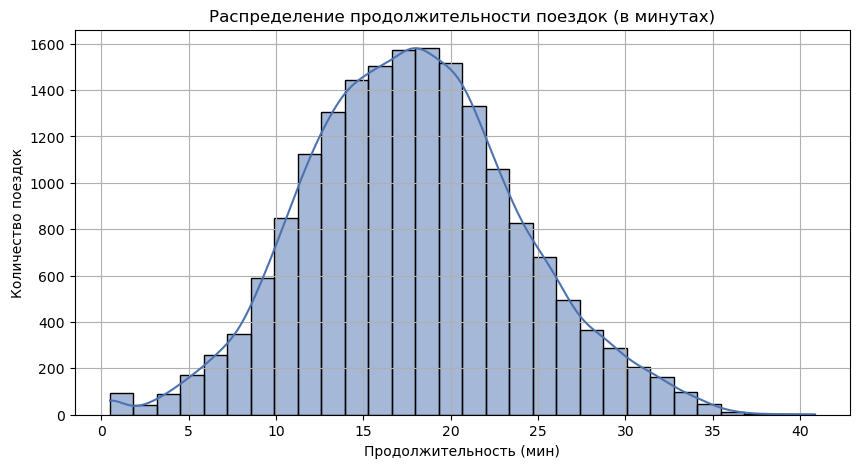

In [77]:
# Цветовая палитра
main_color = '#4C72B0'

# Визуализация
plt.figure(figsize=(10, 5))
sns.histplot(df_rides_go['duration'], bins=30, kde=True, color=main_color)
plt.title('Распределение продолжительности поездок (в минутах)')
plt.xlabel('Продолжительность (мин)')
plt.ylabel('Количество поездок')
plt.grid()
plt.show()


**График показывает:**
- Основная масса поездок длится **от 10 до 25 минут**.
- Пик распределения приходится примерно на **17–18 минут**.
- Поездки дольше 30 минут — редкость, скорее исключения.

**Вывод:**  
Средняя поездка на самокате длится около **15–20 минут**. Это хорошо согласуется с гипотезой «поездка по делам» — в магазин, до транспорта, на встречу.  
Такой временной паттерн можно учитывать при разработке тарифов: например, предлагать выгодные условия для коротких поездок до 20 минут или пакеты минут.

---

### Шаг 4. Объединение данных

#### 4.1 Объединение данных

**Цель:** объединить информацию о пользователях, их поездках и условиях подписки в один датафрейм для дальнейшего анализа.

**Что объединяем:**
- Таблицу `df_users_go` — информация о пользователях.
- Таблицу `df_rides_go` — информация о каждой поездке.
- Таблицу `df_subscriptions_go` — условия подписки (цены, тарификация).

**Результат:**  
Создан единый датафрейм `df_merged`, содержащий всю необходимую информацию по каждому пользователю и его поездкам.  
Далее на его основе можно формировать сегменты, считать выручку и строить сравнения между подписчиками и бесплатными пользователями.

In [86]:
# Объединение пользователей и поездок по user_id
df_merged = df_users_go.merge(df_rides_go, on='user_id', how='inner')

# Объединение с тарифами по типу подписки
df_merged = df_merged.merge(df_subscriptions_go, on='subscription_type', how='left')

# Просмотр итоговой таблицы
df_merged.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


#### 4.2 Разделение пользователей по подписке

**Цель:** разделить объединённый датафрейм `df_merged` на две группы для последующего сравнения.

- `df_free` — пользователи с бесплатной подпиской (`subscription_type == 'free'`);
- `df_ultra` — пользователи с платной подпиской (`subscription_type == 'ultra'`).

**Зачем это нужно:**  
Разделение позволит сравнить поведение двух аудиторий — сколько ездят, как долго, и насколько окупается платная модель.

In [91]:
# Пользователи с бесплатной подпиской
df_free = df_merged[df_merged['subscription_type'] == 'free'].copy()

# Пользователи с платной подпиской
df_ultra = df_merged[df_merged['subscription_type'] == 'ultra'].copy()

#### 4.3 Визуализация расстояния и времени поездок

**Цель:** сравнить поведение пользователей с подпиской и без подписки.

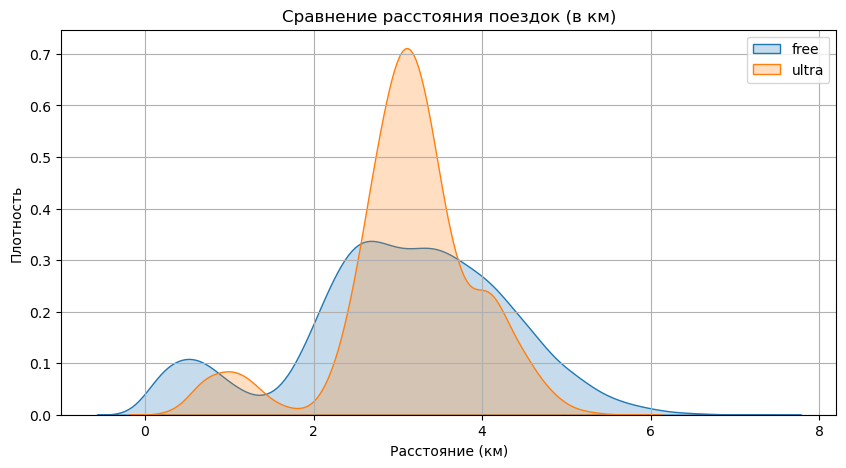

In [94]:
# Расстояние поездок (в км)
plt.figure(figsize=(10, 5))
sns.kdeplot(df_free['distance'] / 1000, label='free', fill=True)
sns.kdeplot(df_ultra['distance'] / 1000, label='ultra', fill=True)
plt.title('Сравнение расстояния поездок (в км)')
plt.xlabel('Расстояние (км)')
plt.ylabel('Плотность')
plt.legend()
plt.grid()
plt.show()

**Расстояние поездок**

**График показывает:**
- Пользователи с платной подпиской (`ultra`) совершают более **предсказуемые** и **чуть более длинные** поездки.
- У пользователей без подписки (`free`) расстояние **варьируется шире** — есть и короткие, и длинные маршруты.
- Пик у `ultra` более выраженный — около **3.2 км**, тогда как у `free` — около **2.8 км** с более размазанным распределением.

**Вывод:**  
Платные пользователи склонны использовать самокаты **регулярно и по делам** — возможно, добраться до офиса, университета или метро.  
Бесплатные чаще тестируют, катаются для развлечения или используют эпизодически.

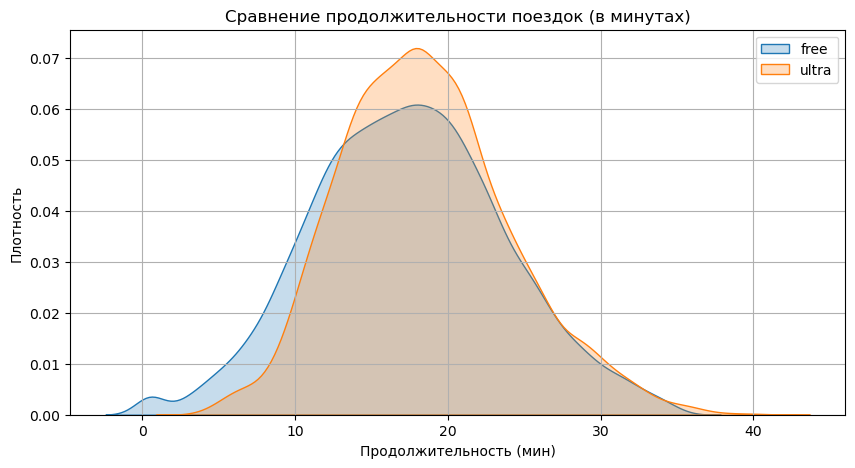

In [96]:
# Продолжительность поездок (в минутах)
plt.figure(figsize=(10, 5))
sns.kdeplot(df_free['duration'], label='free', fill=True)
sns.kdeplot(df_ultra['duration'], label='ultra', fill=True)
plt.title('Сравнение продолжительности поездок (в минутах)')
plt.xlabel('Продолжительность (мин)')
plt.ylabel('Плотность')
plt.legend()
plt.grid()
plt.show()

**Продолжительность поездок**

**График показывает:**
- У пользователей с подпиской (`ultra`) средняя продолжительность поездки **чуть выше**, пик смещён вправо (~19 минут).
- У пользователей без подписки (`free`) пик распределения ближе к **17 минутам**.
- У `ultra` больше "хвост" — то есть встречаются поездки продолжительностью свыше 30 минут.

**Вывод:**  
Платные пользователи проводят в поездке **больше времени**, вероятно, не ограничивая себя из-за тарификации.  
Это говорит о более активном и, возможно, **целевом** использовании сервиса: поездка по делам, а не просто прокатиться.  
Такая аналитика может лечь в основу предложения — например, минутных пакетов или опции продления для `free`-пользователей.


### Шаг 5. Подсчёт выручки

#### 5.1 Агрегирование данных по пользователю и месяцу

**Цель:** подготовить агрегированный датафрейм с активностью каждого пользователя по месяцам.

**Что считаем:**
- `distance` — общее расстояние (метры),
- `duration` — общее время поездок (минуты),
- `ride_count` — количество поездок.

**Группировка выполняется по:**
- `user_id`,
- `name`,
- `subscription_type`,
- `month`.

**Результат:**  
Создан датафрейм `df_grouped`, где каждая строка — пользователь в определённом месяце с обобщёнными значениями по активности.

In [102]:
# Группировка по пользователю, имени, подписке и месяцу
df_grouped = df_merged.groupby(
    ['user_id', 'name', 'subscription_type', 'month'],
    as_index=False
).agg({
    'distance': 'sum',
    'duration': 'sum',
    'date': 'count'  # количество поездок
})

# Переименование столбца с количеством поездок
df_grouped.rename(columns={'date': 'ride_count'}, inplace=True)

# Просмотр результата
df_grouped.head()


,user_id,name,subscription_type,month,distance,duration,ride_count
0,1,Кира,ultra,1,7027.511294,41.416640,2
1,1,Кира,ultra,4,754.159807,6.232113,1
2,1,Кира,ultra,8,6723.470560,44.776802,2
3,1,Кира,ultra,10,5809.911100,31.578017,2
4,1,Кира,ultra,11,7003.499363,53.397424,3


#### 5.2 Расчёт выручки по месяцам

**Цель:** определить, сколько денег принёс каждый пользователь в каждом месяце с учётом их типа подписки.

**Условия:**
- `free`: оплачивают каждую поездку и минуты.
- `ultra`: платят только фиксированную сумму — `199` в месяц, вне зависимости от количества поездок.

In [105]:
# Добавим столбец выручки
def calculate_monthly_revenue(row):
    if row['subscription_type'] == 'free':
        return (row['ride_count'] * 29) + (row['duration'] * 8)
    else:  # ultra
        return 199  # фиксированная месячная оплата

df_grouped['revenue'] = df_grouped.apply(calculate_monthly_revenue, axis=1)

# Просмотр результата
df_grouped.head()


,user_id,name,subscription_type,month,distance,duration,ride_count,revenue
0,1,Кира,ultra,1,7027.511294,41.416640,2,199.0
1,1,Кира,ultra,4,754.159807,6.232113,1,199.0
2,1,Кира,ultra,8,6723.470560,44.776802,2,199.0
3,1,Кира,ultra,10,5809.911100,31.578017,2,199.0
4,1,Кира,ultra,11,7003.499363,53.397424,3,199.0


**Результат:**  
Добавлен столбец `revenue` с посчитанной выручкой по каждому пользователю в разрезе месяцев.

---

### Шаг 6. Проверка гипотез

#### 6.1 Сравнение времени поездки между подписчиками и пользователями без подписки

**Гипотезы:**
- **H₀:** средняя продолжительность поездки у пользователей с подпиской (`ultra`) **не превышает** среднюю у `free`
- **H₁:** пользователи с подпиской **тратят больше времени** на поездку

In [116]:
from scipy.stats import ttest_ind

# Получаем выборки
ultra_durations = df_ultra['duration']
free_durations = df_free['duration']

# Проверка на равенство дисперсий (по умолчанию считаем дисперсии неравными)
t_stat, p_value = ttest_ind(ultra_durations, free_durations, equal_var=False, alternative='greater')

print(f'Статистика t: {t_stat:.3f}')
print(f'p-value: {p_value:.5f}')

Статистика t: 12.683
p-value: 0.00000


**Вывод:**  
p-value значительно меньше 0.05, поэтому мы **отвергаем нулевую гипотезу**.  
Это означает, что с высокой степенью уверенности можно утверждать:  
**пользователи с подпиской тратят больше времени на поездку**, чем те, у кого подписки нет.  
Подписчики действительно могут быть **более вовлечёнными и ценными** клиентами.

#### 6.2 Проверка: превышает ли среднее расстояние поездки у подписчиков 3130 метров?

**Гипотезы:**
- **H₀:** среднее расстояние поездки у подписчиков **не превышает** 3130 м
- **H₁:** среднее расстояние **превышает** 3130 м

In [120]:
from scipy.stats import ttest_1samp

# Берём выборку расстояний у подписчиков
ultra_distances = df_ultra['distance']

# Гипотеза: среднее расстояние ≤ 3130
t_stat, p_value = ttest_1samp(ultra_distances, popmean=3130, alternative='greater')

print(f'Статистика t: {t_stat:.3f}')
print(f'p-value: {p_value:.5f}')


Статистика t: -1.402
p-value: 0.91954


**Результаты:**
- Статистика t: **-1.402**
- p-value: **0.91954**

**Вывод:**  
p-value значительно **больше** 0.05 — мы **не отвергаем нулевую гипотезу**.  
Это означает, что **у нас нет оснований утверждать**, что подписчики в среднем проезжают **больше 3130 метров** за поездку.  
Напротив, данные **подтверждают, что средняя дистанция не превышает 3130 м**, что соответствует критерию оптимального износа самоката.

#### 6.3 Проверка: отличается ли помесячная выручка между пользователями с подпиской и без

**Гипотезы:**
- **H₀:** средняя месячная выручка от пользователей с подпиской **не превышает** выручку от пользователей без подписки
- **H₁:** пользователи с подпиской приносят **больше** выручки в месяц

In [124]:
from scipy.stats import ttest_ind

# Разделим агрегированный датафрейм на две выборки по подписке
ultra_rev = df_grouped[df_grouped['subscription_type'] == 'ultra']['revenue']
free_rev = df_grouped[df_grouped['subscription_type'] == 'free']['revenue']

# Проверка гипотезы
t_stat, p_value = ttest_ind(ultra_rev, free_rev, equal_var=False, alternative='greater')

print(f'Статистика t: {t_stat:.3f}')
print(f'p-value: {p_value:.5f}')


Статистика t: -44.013
p-value: 1.00000


C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


**Результаты:**
- Статистика t: **-44.013**
- p-value: **1.00000**

**Вывод:**  
p-value = 1.00000 — это означает, что нулевая гипотеза **не может быть отвергнута**.  
Более того, значение t-статистики **отрицательное**, что указывает на противоположное направление:  
**средняя месячная выручка от пользователей без подписки даже выше, чем от подписчиков**.

**Заключение:**  
Нельзя утверждать, что подписчики приносят больше выручки в месяц. Важно учитывать, что платные пользователи платят фиксированную сумму, а бесплатные — платят только при активных поездках.  
Это открывает потенциал для **гибридных моделей монетизации** или **разных сценариев тарификации**.

---

### Шаг 7. Распределения

#### 7.1 Расчёт среднего и стандартного отклонения длительности поездки

**Цель:** определить параметры нормального распределения (среднее и стандартное отклонение) на основе выборки всех поездок.

In [133]:
# Расчёт среднего и стандартного отклонения
mean_duration = df_merged['duration'].mean()
std_duration = df_merged['duration'].std()

print(f'Средняя длительность поездки: {mean_duration:.2f} мин')
print(f'Стандартное отклонение: {std_duration:.2f} мин')


Средняя длительность поездки: 17.81 мин
Стандартное отклонение: 6.09 мин


**Результаты:**
- **Средняя длительность поездки:** 17.81 минут
- **Стандартное отклонение:** 6.09 минут

**Вывод:**  
Полученные параметры можно использовать для моделирования нормального распределения и оценки вероятности различных сценариев: например, поездок длительностью более 30 минут или в интервале от 20 до 30 минут.

#### 7.2 Расчёт вероятности поездки более 30 минут

**Цель:** оценить вероятность того, что пользователь проведёт в поездке **более 30 минут**.

**Что делаем:**  
Используем нормальное распределение с параметрами:
- Среднее: **17.81 мин**
- Стандартное отклонение: **6.09 мин**

С помощью функции **CDF** находим:

P(X>30)=1−CDF(30)

In [137]:
from scipy.stats import norm

# Параметры из п. 7.1
mean = 17.81
std = 6.09

# Вероятность поездки более 30 минут
prob_over_30 = 1 - norm.cdf(30, loc=mean, scale=std)

print(f'Вероятность поездки > 30 минут: {prob_over_30:.4f} ({prob_over_30 * 100:.2f}%)')


Вероятность поездки > 30 минут: 0.0227 (2.27%)


**Результат:**
- Вероятность поездки дольше 30 минут: **0.0227** (или **2.27%**)

**Вывод:**  
Только **примерно 2.27%** поездок длится более 30 минут.  
Это довольно низкий процент, и проведение промоакции только для таких поездок вряд ли окажет существенное влияние на общую лояльность или поведение пользователей.

#### 7.3 Расчёт вероятности поездки от 20 до 30 минут

**Цель:** определить, сколько поездок укладывается в интервал от **20 до 30 минут** — возможно, именно на этих пользователей стоит нацелить промоакцию.

**Что делаем:**  
Используем нормальное распределение с параметрами:
- Среднее: **17.81 мин**
- Стандартное отклонение: **6.09 мин**

Вычисляем:

P(20≤X≤30)=CDF(30)−CDF(20)

In [147]:
from scipy.stats import norm

# Параметры
mean = 17.81
std = 6.09

# Расчёт вероятности попасть в интервал от 20 до 30 минут
prob_20_30 = norm.cdf(30, loc=mean, scale=std) - norm.cdf(20, loc=mean, scale=std)

print(f'Вероятность поездки от 20 до 30 минут: {prob_20_30:.4f} ({prob_20_30 * 100:.2f}%)')


Вероятность поездки от 20 до 30 минут: 0.3369 (33.69%)


**Результат:**
- Вероятность поездки от 20 до 30 минут: **0.3369** (или **33.69%**)

**Вывод:**  
Почти **треть всех поездок** укладывается в диапазон от 20 до 30 минут.  
Это делает **эту группу гораздо более перспективной для проведения акций и мотивации** — охват будет ощутимо выше, чем у поездок более 30 минут (всего 2.27%).

#### 7.4 Расчёт критической длительности поездки (90-й процентиль)

**Цель:** определить, какое значение длительности поездки превышается только в **10% случаев**.  
Это значение можно использовать как **порог**, после которого к поездке применяется **дополнительная плата** — чтобы снизить нагрузку на самокаты.

**Что делаем:**  
Используем нормальное распределение с параметрами:
- Средняя длительность: **17.81 мин**
- Стандартное отклонение: **6.09 мин**

Вычисляем 90-й процентиль:

X 
90
​
 =PPF(0.9)

In [152]:
from scipy.stats import norm

# Параметры нормального распределения
mean = 17.81
std = 6.09

# Расчёт 90-го процентиля
critical_duration = norm.ppf(0.9, loc=mean, scale=std)

print(f'Критическая длительность (90-й процентиль): {critical_duration:.2f} мин')


Критическая длительность (90-й процентиль): 25.61 мин



**Результат:**
- **Критическая длительность поездки:** **25.61 минут**

**Вывод:**  
Только **10% поездок** длятся **дольше 25.61 минут**. (25.61 минут = 25 минут и 37 секунд (с округлением))  
Это значение можно использовать как логическую границу для повышения тарифа, так как оно охватывает лишь небольшой, но потенциально затратный сегмент пользователей.

---

## Вывод по проекту

### Общие наблюдения
- Аудитория сервиса GoFast — преимущественно молодые люди в возрасте **18–30 лет**, живущие в крупных городах.
- Пользователи с подпиской (`ultra`) совершают **длиннее и продолжительнее** поездки, чем пользователи без подписки (`free`).
- **Средняя поездка** длится **17.81 минут**, что соответствует перемещению на короткие и средние дистанции в городе.

### Подписки и выручка
- Подписчики платят фиксированную сумму — **199₽ в месяц**.
- Пользователи без подписки платят по поездке и минутам — **их месячная выручка может быть выше**, особенно при высокой активности.
- **Гипотеза о большей выручке от подписчиков не подтвердилась.**

### Проверка гипотез
- ✅ **Подписчики тратят больше времени на поездку** — разница статистически значима.
- ❌ Средняя дистанция поездки у `ultra` **не превышает** 3130 м — ограничение по износу не нарушается.
- ❌ Месячная выручка от подписчиков **не выше**, чем от бесплатных пользователей.

### Рекомендации для бизнеса
- Только **2.27%** поездок длятся **дольше 30 минут** — делать промо на них **нецелесообразно**.
- **33.7%** поездок укладываются в диапазон **от 20 до 30 минут** — идеальная аудитория для промоакций и бонусов.
- **90-й процентиль по длительности**: **25.61 минут** — логичный порог для внедрения дополнительной платы за чрезмерно длительные поездки.
- Рассмотреть внедрение **гибридных тарифов**: базовая подписка + бонусные минуты + платные сверхлимитные поездки.

### Итого
Сервису стоит акцентироваться на:
- удержании и повторной активации подписчиков;
- стимулировании поездок **средней продолжительности**;
- увеличении окупаемости за счёт гибких тарифных моделей.